## **Nível do mar em Cananéia por séries temporais**

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

### Passo 1: carregar os dados em um panda dataframe 

In [2]:
df = pd.read_csv("integrativa - Página2.csv")

In [3]:
df['sl'] = df['sl'] / 1000

In [4]:
df

,segundos,ano,m├ςs,dia,hora,sl,flag,mar
0,0,2004,1,1,0.0,2.171,0,"2,171"
1,3600,2004,1,1,1.2,2.069,0,"2,069"
2,7200,2004,1,1,2.2,1.938,0,"1,938"
3,10800,2004,1,1,3.2,1.860,0,"1,860"
4,14400,2004,1,1,4.2,1.792,0,"1,792"
...,...,...,...,...,...,...,...,...
8756,31604400,2004,12,31,190000.0,2.155,0,"2,155"
8757,31608000,2004,12,31,200000.0,2.041,0,"2,041"
8758,31611600,2004,12,31,210000.0,1.828,0,"1,828"
8759,31615200,2004,12,31,220000.0,1.613,0,"1,613"


### Passo 2: criar uma série de datas 
criar um `timestamp`
a função `datatime`requer a especificação do dia, além de mês e ano.

In [5]:
# criar array de datatime e coloca no dataframe de nível do mar
date = pd.to_datetime(df['segundos'], unit = 's', origin= pd.Timestamp('2004-01-01'))
date

0      2004-01-01 00:00:00
1      2004-01-01 01:00:00
2      2004-01-01 02:00:00
3      2004-01-01 03:00:00
4      2004-01-01 04:00:00
               ...        
8756   2004-12-31 19:00:00
8757   2004-12-31 20:00:00
8758   2004-12-31 21:00:00
8759   2004-12-31 22:00:00
8760   2004-12-31 23:00:00
Name: segundos, Length: 8761, dtype: datetime64[ns]

In [17]:
sealevel  = pd.to_numeric(df['sl'])

In [18]:
df = df.set_index(date)

In [19]:
# remover dados errados com a flag de qualidade e com uma consição de magnitude de dado 
df = df.drop(df[df['flag'] == 2].index)


In [20]:
df

,segundos,ano,m├ςs,dia,hora,sl,flag,mar,datetime
segundos,,,,,,,,,
2004-01-01 00:00:00,0,2004,1,1,0.0,2.171,0,"2,171",2004-01-01 00:00:00
2004-01-01 01:00:00,3600,2004,1,1,1.2,2.069,0,"2,069",2004-01-01 01:00:00
2004-01-01 02:00:00,7200,2004,1,1,2.2,1.938,0,"1,938",2004-01-01 02:00:00
2004-01-01 03:00:00,10800,2004,1,1,3.2,1.860,0,"1,860",2004-01-01 03:00:00
2004-01-01 04:00:00,14400,2004,1,1,4.2,1.792,0,"1,792",2004-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...
2004-12-31 19:00:00,31604400,2004,12,31,190000.0,2.155,0,"2,155",2004-12-31 19:00:00
2004-12-31 20:00:00,31608000,2004,12,31,200000.0,2.041,0,"2,041",2004-12-31 20:00:00
2004-12-31 21:00:00,31611600,2004,12,31,210000.0,1.828,0,"1,828",2004-12-31 21:00:00


### Passo 3: vizualizar os dados 
Plotar a série temporal de nível médio do mar. Colocar labels no gráfico. Escrever algumas anotações sobre o gráfico. 

([<matplotlib.axis.XTick at 0x21223916ed0>,
 [Text(12418.0, 0, 'Janeiro'),
  Text(12478.0, 0, 'Março'),
  Text(12539.0, 0, 'Maio'),
  Text(12600.0, 0, 'Julho'),
  Text(12662.0, 0, 'Setembro'),
  Text(12723.0, 0, 'Novembro')])

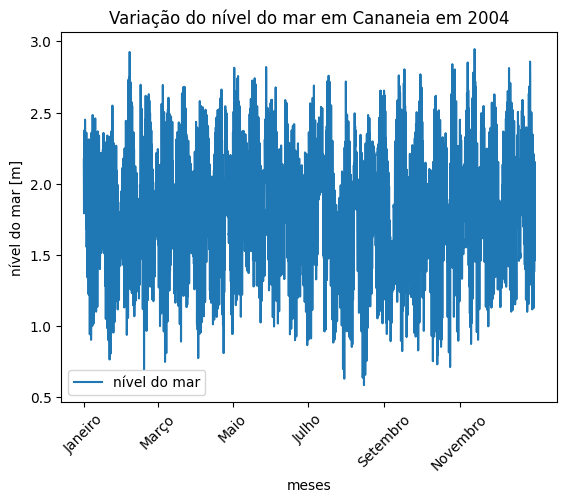

In [23]:
# PLOTAR 
plt.figure()
plt.plot(sealevel,label='nível do mar')
plt.legend()
plt.xlabel('meses')
plt.ylabel('nível do mar [m]')
plt.title('Variação do nível do mar em Cananeia em 2004')
ticksano = ['2004-01','2004-03','2004-05','2004-07','2004-09','2004-11']
labelsano = ['Janeiro','Março','Maio','Julho','Setembro','Novembro']
plt.xticks(ticksano, labelsano, rotation=45)

### Plotar variação de maré para 1 mês 

In [11]:
df['datetime'] = pd.to_datetime(df['segundos'], unit = 's', origin= pd.Timestamp('2004-01-01'))

In [12]:
mes_selecionado = 2
ano_selecionado = 2004

df_mes_selecionado = df.loc[(df['datetime'].dt.month == mes_selecionado) & (df['datetime'].dt.year == ano_selecionado)]


In [27]:
df = df.set_index(date)

In [29]:
df = df.drop(df[df['m├ςs'] != 2].index)

In [30]:
df_mes_selecionado

,segundos,ano,m├ςs,dia,hora,sl,flag,mar,datetime
segundos,,,,,,,,,
2004-02-01 00:00:00,2678400,2004,2,1,0.0,2.024,0,"2,024",2004-02-01 00:00:00
2004-02-01 01:00:00,2682000,2004,2,1,1.2,2.109,0,"2,109",2004-02-01 01:00:00
2004-02-01 02:00:00,2685600,2004,2,1,2.2,2.070,0,"2,070",2004-02-01 02:00:00
2004-02-01 03:00:00,2689200,2004,2,1,3.2,1.988,0,"1,988",2004-02-01 03:00:00
2004-02-01 04:00:00,2692800,2004,2,1,4.2,1.851,0,"1,851",2004-02-01 04:00:00
...,...,...,...,...,...,...,...,...,...
2004-02-29 19:00:00,5166000,2004,2,29,190000.0,1.730,0,"1,730",2004-02-29 19:00:00
2004-02-29 20:00:00,5169600,2004,2,29,200000.0,1.717,0,"1,717",2004-02-29 20:00:00
2004-02-29 21:00:00,5173200,2004,2,29,210000.0,1.815,0,"1,815",2004-02-29 21:00:00


([<matplotlib.axis.XTick at 0x21222316950>,
 [Text(12449.0, 0, '01'),
  Text(12453.0, 0, '05'),
  Text(12457.0, 0, '09'),
  Text(12461.0, 0, '13'),
  Text(12465.0, 0, '17'),
  Text(12469.0, 0, '21'),
  Text(12473.0, 0, '25'),
  Text(12477.0, 0, '29')])

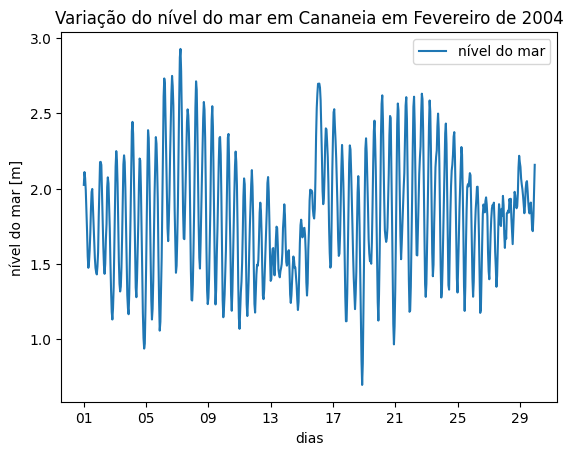

In [31]:
plt.figure()
plt.plot(df_mes_selecionado['sl'],label='nível do mar')
plt.legend()
plt.xlabel('dias')
plt.ylabel('nível do mar [m]')
plt.title('Variação do nível do mar em Cananeia em Fevereiro de 2004')

ticks = ['2004-02-01','2004-02-05','2004-02-09','2004-02-13','2004-02-17','2004-02-21','2004-02-25','2004-02-29']
labels = ['01','05','09','13','17','21','25','29']
plt.xticks(ticks, labels)

### Plotar variação da maré para um dia

In [32]:
hora_inicial = 0.0
hora_final = 230000

df_periodo_dia = df.loc[(df['datetime'].dt.day == 19) & (df['datetime'].dt.month == 2) & (df['datetime'].dt.year == 2004) & (df['datetime'].dt.hour >= hora_inicial) & (df['datetime'].dt.hour <= hora_final)]

In [33]:
df_periodo_dia

,segundos,ano,m├ςs,dia,hora,sl,flag,mar,datetime
segundos,,,,,,,,,
2004-02-19 00:00:00,4233600,2004,2,19,0.0,1.559,0,"1,559",2004-02-19 00:00:00
2004-02-19 01:00:00,4237200,2004,2,19,1.2,1.952,0,"1,952",2004-02-19 01:00:00
2004-02-19 02:00:00,4240800,2004,2,19,2.2,2.265,0,"2,265",2004-02-19 02:00:00
2004-02-19 03:00:00,4244400,2004,2,19,3.2,2.333,0,"2,333",2004-02-19 03:00:00
2004-02-19 04:00:00,4248000,2004,2,19,4.2,2.237,0,"2,237",2004-02-19 04:00:00
2004-02-19 05:00:00,4251600,2004,2,19,5.2,2.060,0,"2,060",2004-02-19 05:00:00
2004-02-19 06:00:00,4255200,2004,2,19,6.2,1.876,0,"1,876",2004-02-19 06:00:00
2004-02-19 07:00:00,4258800,2004,2,19,7.2,1.664,0,"1,664",2004-02-19 07:00:00
2004-02-19 08:00:00,4262400,2004,2,19,8.2,1.569,0,"1,569",2004-02-19 08:00:00


([<matplotlib.axis.XTick at 0x212295a21d0>,
 [Text(12467.0, 0, '00:00'),
  Text(12467.125, 0, '03:00'),
  Text(12467.25, 0, '06:00'),
  Text(12467.375, 0, '09:00'),
  Text(12467.5, 0, '12:00'),
  Text(12467.625, 0, '15:00'),
  Text(12467.75, 0, '18:00'),
  Text(12467.875, 0, '21:00'),
  Text(12468.0, 0, '00:00')])

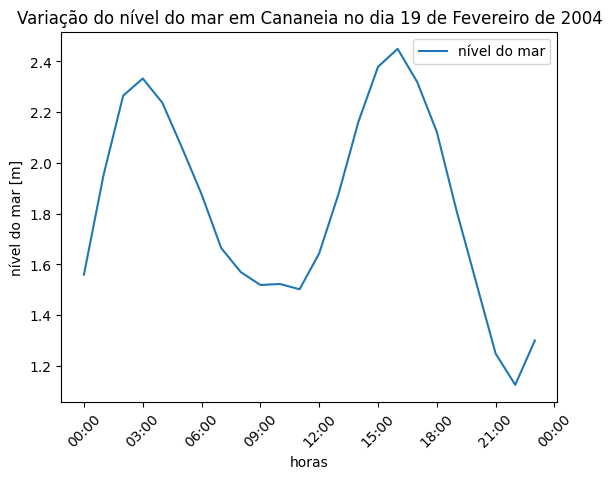

In [36]:
plt.figure()
plt.plot(df_periodo_dia['sl'],label='nível do mar')
plt.legend()
plt.xlabel('horas')
plt.ylabel('nível do mar [m]')
plt.title('Variação do nível do mar em Cananeia no dia 19 de Fevereiro de 2004')
ticks = ['2004-02-19 00:00:00','2004-02-19 03:00:00','2004-02-19 06:00:00','2004-02-19 09:00:00','2004-02-19 12:00:00','2004-02-19 15:00:00','2004-02-19 18:00:00','2004-02-19 21:00:00','2004-02-20 00:00:00']
labels = ['00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','00:00']
plt.xticks(ticks,labels,rotation=45)